In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    preprocessing_function=to_grayscale_then_rgb,
    validation_split=0.27)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\CroppedContrasted\Dataset",
    target_size=(200, 200),
    batch_size=8,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\CroppedContrasted\Dataset", # same directory as training data
    target_size=(200, 200),
    batch_size=1,
    class_mode='binary',
    subset='validation')

Found 400 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


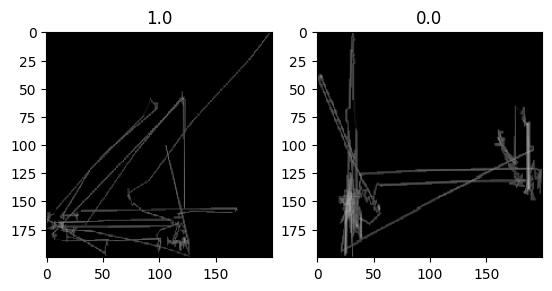

In [3]:
images, labels = train_generator.next()

fig, axes = plt.subplots(1, 2)
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])
# show the figure
plt.show()

In [4]:
##Defining the Network 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.30))

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.30))

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.30))

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.30))

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.30))

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.30))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units= 64, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(units= 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

cnn.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 99, 99, 64)        0         
                                                                 
 flatten (Flatten)           (None, 627264)            0         
                                                                 
 dense (Dense)               (None, 64)                40144960  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [5]:
history = cnn.fit(train_generator, validation_data=validation_generator, epochs = 8)

Epoch 1/8
50/50 [==============================] - 24s 454ms/step - loss: 0.1633 - accuracy: 0.6200 - val_loss: 0.1414 - val_accuracy: 0.7415
Epoch 2/8
50/50 [==============================] - 22s 434ms/step - loss: 0.1088 - accuracy: 0.8075 - val_loss: 0.1337 - val_accuracy: 0.6667
Epoch 3/8
50/50 [==============================] - 22s 441ms/step - loss: 0.0527 - accuracy: 0.9525 - val_loss: 0.1277 - val_accuracy: 0.7279
Epoch 4/8
50/50 [==============================] - 22s 444ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.1558 - val_accuracy: 0.7279
Epoch 5/8
50/50 [==============================] - 21s 422ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1468 - val_accuracy: 0.7143
Epoch 6/8
50/50 [==============================] - 21s 425ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.7551
Epoch 7/8
50/50 [==============================] - 21s 428ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1573 - val_accuracy: 0.7891
Epoch 

In [8]:
##Confusion Matrix Generator and ROC Curve
y_pred_real = cnn.predict(validation_generator)
y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
##y_pred = np.argmax(Y_pred, axis=1) ##With softmax and 2 neurons 
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)

147/147 [==============================] - 3s 19ms/step
[[51 37]
 [37 22]]


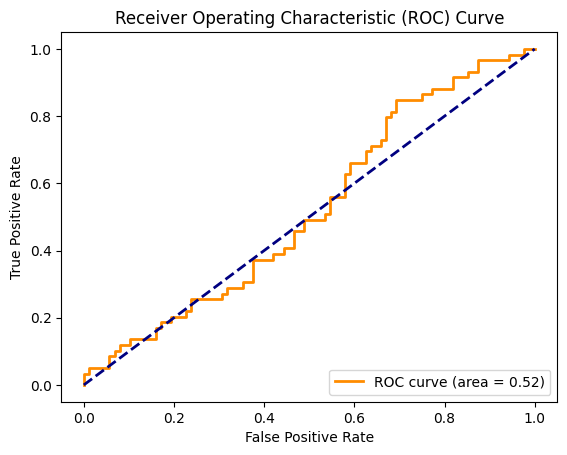

In [9]:
# Calculate the ROC curve and AUC score, sklearn takes probabilities instead of classes
fpr, tpr, thresholds = roc_curve(y_true, y_pred_real)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()